In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
import subprocess
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.style.use('seaborn-v0_8')

deriv_dir = os.path.expanduser("../derivatives/")


# Figure 5a
Saccade-aligned population responses

In [2]:


sacc_fname = os.path.join(deriv_dir, "dataframes/glmsingle/allsubj_vmfits_sacc_ang_dist_bin_saccade-aligned.tsv")
targ_fname = os.path.join(deriv_dir, "dataframes/glmsingle/allsubj_vmfits_ang_dist_bin_target-aligned_comparison.tsv")

sacc_align_data = pd.read_csv(sacc_fname, sep = '\t', index_col = 0)
targ_align_data = pd.read_csv(targ_fname, sep = '\t', index_col = 0)

sacc_align_data.insert(0, 'align', 'saccade')
targ_align_data.insert(0, 'align', 'target')

data = pd.concat([sacc_align_data, targ_align_data])

rois = ['V1', 'V2', 'V3', 'V4', 'LO1', 'V3ab', 'IPS0']
tasks = ['perception', 'wm', 'ltm']


roi_labels_xloc = {roi: (rois.index(roi)+1) for roi in rois}

data.insert(3, 'roi_xloc', data.roi_labels.map(roi_labels_xloc))

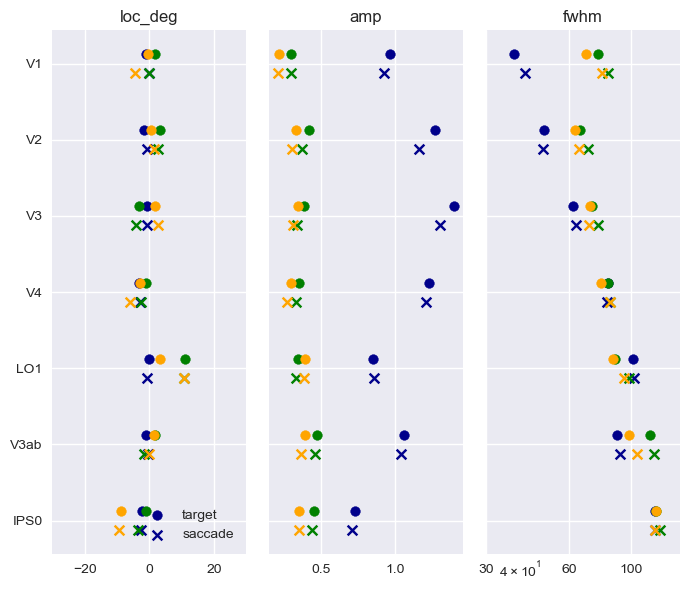

In [3]:

task_cmap = {
    'perception': "darkblue",
    'ltm': 'orange',
    'wm': 'green',
    'wm_target': 'grey'
}

aligns = ['target', 'saccade']

align_mmap = {
    'saccade' : "x",
    'target': 'o'
}

metrics = ['loc_deg', 'amp', 'fwhm']

fig, axs = plt.subplots(1, 3, figsize = [7, 6], sharey = True)

for metric, task, align in itertools.product(metrics, tasks, aligns):
    r = metrics.index(metric)

    d = data.query("task == @task & align == @align")
    y = d.roi_xloc + aligns.index(align)/4 -.125
    x = d[metric]

    ax = axs[r]

    ax.scatter(x, y, color = task_cmap[task], marker = align_mmap[align])

    ax.set_yticks(range(1, 8), rois)
    ax.set_title(metric)
    

axs[0].set_xlim([-30, 30])
axs[2].set_xscale('log')
[ax.invert_yaxis() for ax in axs]

axs[2].set_xlim([30, 150])
axs[2].set_xticks([30, 60, 100], [30, 60, 100])

axs[0].legend(['target', 'saccade'], loc = 'lower right')
fig.tight_layout()


fig.savefig("fig_images/fig5A.pdf", transparent=False)



# Figure 5b

In [4]:
fname_pattern = os.path.join(deriv_dir, "dataframes/glmsingle/allsubj_vmfits_ang_dist_bin_%s_%s.tsv")

tes = ["7", "9", "12"]
sms = ["1"]

data = []
for te, sm in itertools.product(tes, sms):
    fname = fname_pattern % (te, sm)
    df = pd.read_csv(fname, sep = '\t', index_col = 0)

    df.insert(0, 'target_ecc', float(te))
    df.insert(1, 'sigma_multiplier', float(sm))

    data.append(df)

# df = pd.read_csv(os.path.join(deriv_dir, "dataframes/glmsingle/allsubj_vmfits_ang_dist_bin.tsv"), 
#                  sep = '\t', index_col = 0)
# df.insert(0, 'target_ecc', 7)
# df.insert(1, 'sigma_multiplier', 1)

data.append(df)

data = pd.concat(data)

rois = ['V1', 'V2', 'V3', 'V4', 'LO1', 'V3ab', 'IPS0']
tasks = ['perception', 'wm', 'ltm']


roi_labels_xloc = {roi: (rois.index(roi)+1) for roi in rois}

data.insert(3, 'roi_xloc', data.roi_labels.map(roi_labels_xloc))

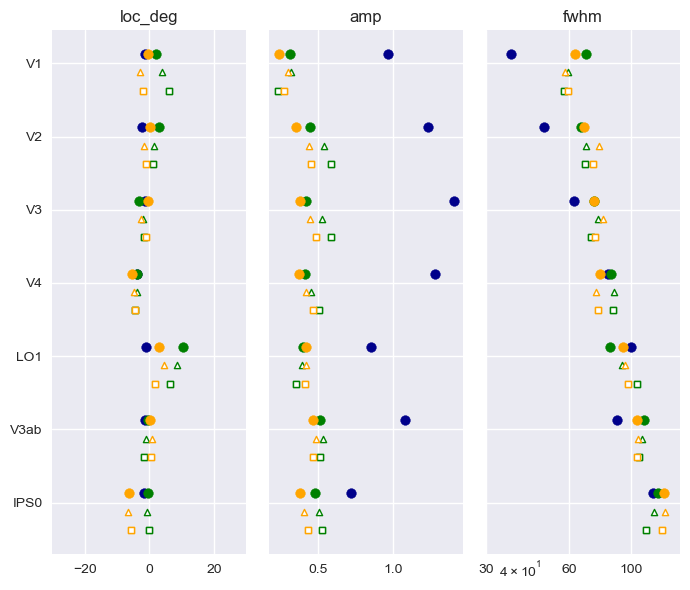

In [5]:
fig, axs = plt.subplots(1, 3, figsize = [7, 6], sharey = True)


task_cmap = {
    'perception': "darkblue",
    'ltm': 'orange',
    'wm': 'green',
    'wm_target': 'grey'
}

ecc_map = {
    '7.0': 'o',
    '9.0' : '^',
    '12.0': 's'
}


metrics = ['loc_deg', 'amp', 'fwhm']
eccs = [7.0, 9.0, 12.0]

for metric, task, ecc in itertools.product(metrics, tasks, eccs):
    if task == 'perception' and ecc != 7: 
        continue

    r = metrics.index(metric)

    d = data.query("task == @task & target_ecc == @ecc")
    y = d.roi_xloc + eccs.index(ecc)/4 -.125
    x = d[metric]

    ax = axs[r]
    if ecc !=  7:
        ax.scatter(x, y, color = task_cmap[task], marker = ecc_map[str(ecc)], facecolor = 'white', linewidth = 1, s = 20)
    else:
        ax.scatter(x, y, color = task_cmap[task], marker = ecc_map[str(ecc)])



    ax.set_yticks(range(1, 8), rois)
    ax.set_title(metric)
    

axs[0].set_xlim([-30, 30])
axs[2].set_xscale('log')
[ax.invert_yaxis() for ax in axs]

axs[2].set_xlim([30, 150])
axs[2].set_xticks([30, 60, 100], [30, 60, 100])

# axs[0].legend(['target', 'saccade'], loc = 'lower right')
fig.tight_layout()


fig.savefig("fig_images/fig5b.pdf", transparent=False)

